In [2]:
import numpy as np 
import pandas as pd 

In [6]:
!pip install wordcloud
!pip install gensim

In [3]:
import pandas
import re
import nltk
import wordcloud

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets') 
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sb
from os import path
from PIL import Image


import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /Users/hejielu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hejielu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /Users/hejielu/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hejielu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hejielu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
df1 = pandas.read_csv('/Users/hejielu/Desktop/final/cleandata.csv')
df1.head()

,dateoftweet,text
0,06/03/2020,israeli priviledge matt lauer somehow jail bac...
1,06/03/2020,normal viewing documentary netflix essential s...
2,06/03/2020,wish say story need voice suppo metoo
3,06/03/2020,psst saw bit blackout tuesday point previous t...
4,06/03/2020,rivera hus hea see many former female student ...


In [15]:
#pre-process the tweet data
def pos_tag(text):
    import string
    # Define stop words
    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ["amp", "39"]
    # Tokenize words using nltk.word_tokenize
    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop]
    # Label parts of speech automatically using NLTK
    pos_tagged = nltk.pos_tag(tokens)
    return pos_tagged
pos_tagged_text = df1['Text'].apply(pos_tag)
pos_tagged_text_full = []
for i in pos_tagged_text:
    pos_tagged_text_full.extend(i)

In [16]:
#Check the NLTK codes in the following way:
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


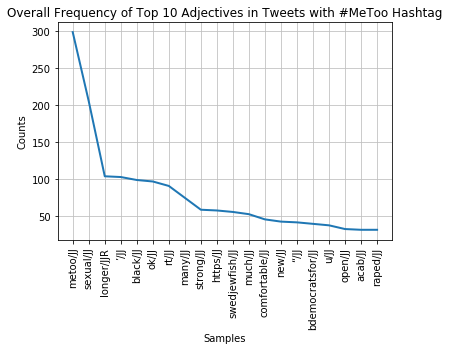

In [17]:
# Plot top adjectives using nltk's built-in Freq. distn. calculator and plotting function
fd = nltk.FreqDist(word + "/" + tag for (word, tag) in pos_tagged_text_full if tag[:2] == 'JJ')
fd.plot(20, title = 'Overall Frequency of Top 10 Adjectives in Tweets with #MeToo Hashtag');

In [20]:
##pre-process the tweet data-delete stopwords,punctuation and URLs
lemmas = []
for i in range(0, df1.shape[0]):
    txt = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",df1['Text'][i])
    p = re.compile(r'\<http.+?\>', re.DOTALL)
    txt = re.sub(p, '', txt)
    txt = txt.lower()
    txt = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",txt)
    txt = re.sub("(\\d|\\W)+"," ",txt)
    txt = txt.split()
    lemm = WordNetLemmatizer()
    txt = [lemm.lemmatize(word) for word in txt if not word in STOPWORDS] 
    txt = " ".join(txt)
    lemmas.append(txt)

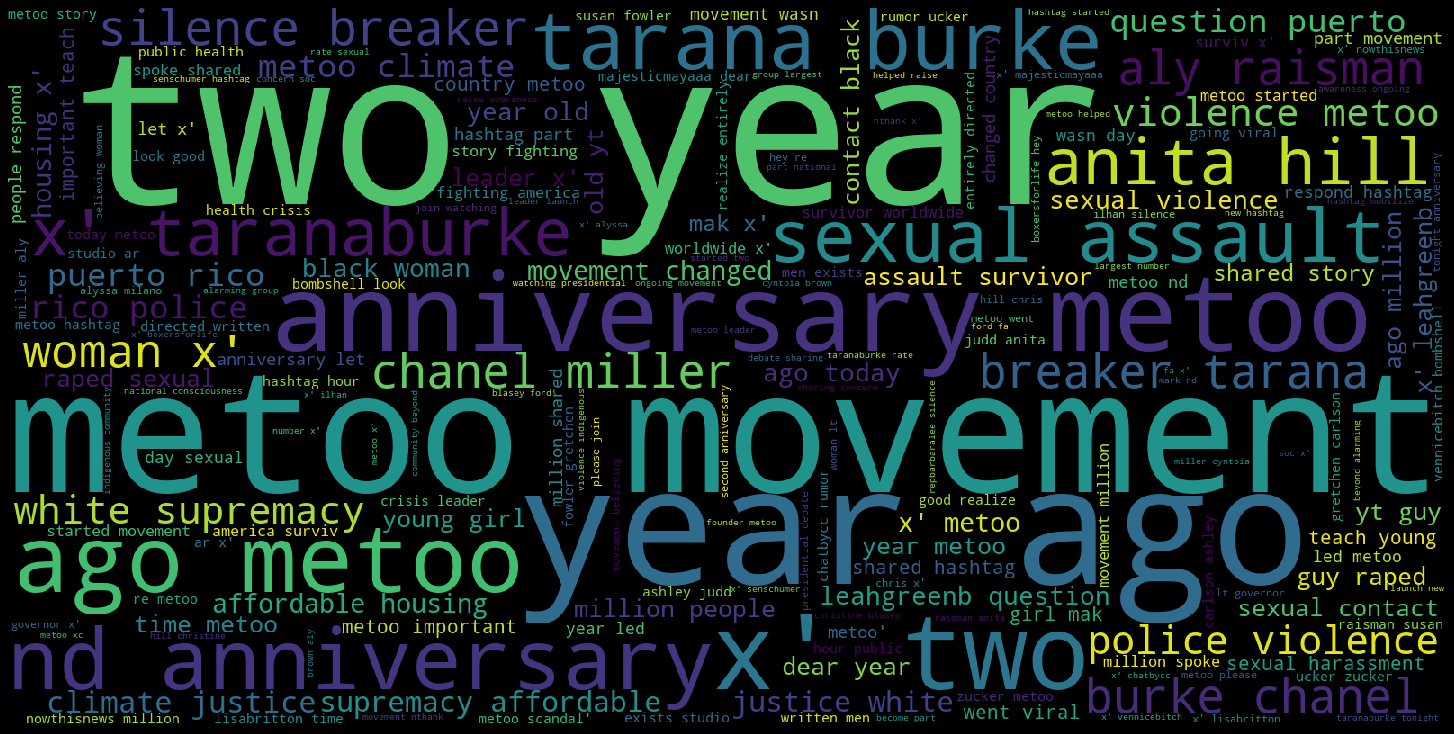

In [15]:
#plot a wordcloud
wordcloud = WordCloud(width=1600, height=800).generate(str(lemmas))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

[Text(0, 0, 'metoo'),
 Text(0, 0, 'year'),
 Text(0, 0, 'movement'),
 Text(0, 0, 'woman'),
 Text(0, 0, 'two'),
 Text(0, 0, 'sexual'),
 Text(0, 0, 'ago'),
 Text(0, 0, 'anniversary'),
 Text(0, 0, 'hashtag'),
 Text(0, 0, 'story'),
 Text(0, 0, 'amp'),
 Text(0, 0, 'million'),
 Text(0, 0, 'violence'),
 Text(0, 0, 'survivor'),
 Text(0, 0, 'nd'),
 Text(0, 0, 'new'),
 Text(0, 0, 'today'),
 Text(0, 0, 'time'),
 Text(0, 0, 'men'),
 Text(0, 0, 'tarana'),
 Text(0, 0, 're'),
 Text(0, 0, 'shared'),
 Text(0, 0, 'burke'),
 Text(0, 0, 'viral'),
 Text(0, 0, 'people')]

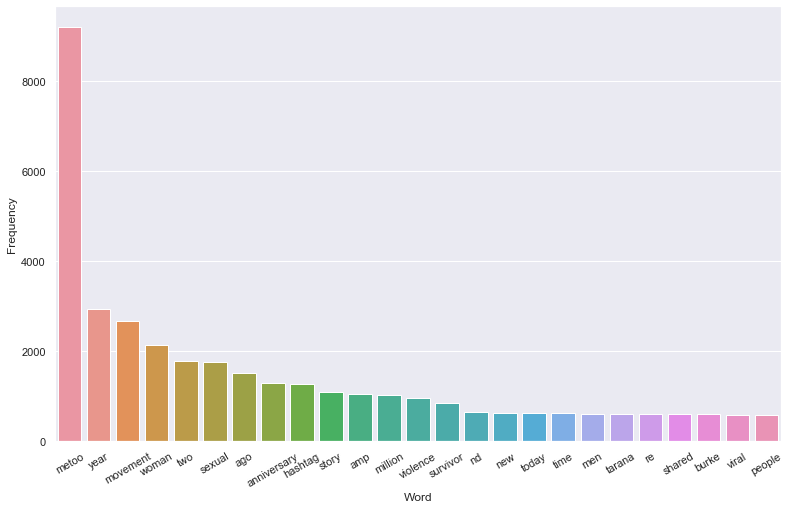

In [19]:
#Most frequent single words after deleting stop words
def fetch_top_nwords(corp, n=None):
    vec = CountVectorizer().fit(corp)
    words_bag = vec.transform(corp)
    sum_words = words_bag.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert  freq words to dataset to plot bar plot
top_words = fetch_top_nwords(lemmas, n=25)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Frequency"]
#plot  most freq words
sb.set(rc={'figure.figsize':(13,8)})
k = sb.barplot(x="Word", y="Frequency", data=top_df)
k.set_xticklabels(k.get_xticklabels(), rotation=30)

              Bi-gram  Frequency
0            two year       1665
1      metoo movement       1580
2            year ago       1410
3   anniversary metoo        811
4           ago metoo        617
5      nd anniversary        614
6        tarana burke        594
7      sexual assault        525
8          anita hill        417
9     silence breaker        405
10      chanel miller        402
11     breaker tarana        401
12       burke chanel        401
13        aly raisman        401
14    police violence        383
15    white supremacy        381
16     violence metoo        380
17    question puerto        379
18        puerto rico        379
19        rico police        379


[Text(0, 0, 'two year'),
 Text(0, 0, 'metoo movement'),
 Text(0, 0, 'year ago'),
 Text(0, 0, 'anniversary metoo'),
 Text(0, 0, 'ago metoo'),
 Text(0, 0, 'nd anniversary'),
 Text(0, 0, 'tarana burke'),
 Text(0, 0, 'sexual assault'),
 Text(0, 0, 'anita hill'),
 Text(0, 0, 'silence breaker'),
 Text(0, 0, 'chanel miller'),
 Text(0, 0, 'breaker tarana'),
 Text(0, 0, 'burke chanel'),
 Text(0, 0, 'aly raisman'),
 Text(0, 0, 'police violence'),
 Text(0, 0, 'white supremacy'),
 Text(0, 0, 'violence metoo'),
 Text(0, 0, 'question puerto'),
 Text(0, 0, 'puerto rico'),
 Text(0, 0, 'rico police')]

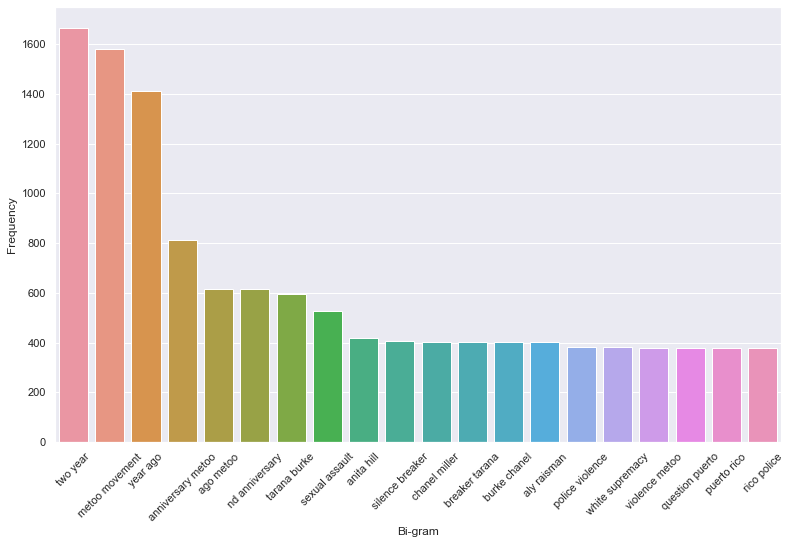

In [17]:
#Most frequent Bi-grams
def fetch_top_n2words(corp, n=None):
    vecn2 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corp)
    words_bag = vecn2.transform(corp)
    sum_words = words_bag.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vecn2.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top_2words = fetch_top_n2words(lemmas, n=20)
top2_df = pandas.DataFrame(top_2words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)

#Plot most freq Bi-grams
sb.set(rc={'figure.figsize':(13,8)})
b=sb.barplot(x="Bi-gram", y="Frequency", data=top2_df)
b.set_xticklabels(b.get_xticklabels(), rotation=45)